## Long-Short Cross-Sectional Momentum Strategy

- Ranking Period: 6 months
- Holding Period: 1 months
- Assets in losers portfolio: 10
- Assets in winners portfolio: 10
- Rebalance technique: Equally-weighted

In [3]:
from zipline.finance.commission import PerDollar
%matplotlib inline
from datetime import datetime
import pytz
from trading_calendars import get_calendar
from zipline import run_algorithm
from zipline.api import schedule_function
from zipline.utils.events import date_rules, time_rules
from strategies.momentum import Momentum
import pandas as pd

def initialize(context):
    strategy = Momentum(ranking_period=6,
                                holding_period=6,
                                momentum_gap=1,
                                losers_amount=15,
                                winners_amount=15)
    strategy.initialize(context)
    context.strategy = strategy


def rebalance(context, data):
    context.strategy.rebalance(context, data)


def analyze(context, perf: pd.DataFrame) -> None:
    context.strategy.analyze(context, perf)

Initialized strategy CSMOM_L_S_6_6.pickle at 0.0 seconds
2012-02-01 - Last Month Result: -0.97%
2012-03-01 - Last Month Result: -1.08%
2012-04-02 - Last Month Result: 1.95%
2012-05-02 - Last Month Result: 0.55%
2012-06-01 - Last Month Result: -0.93%
2012-07-02 - Last Month Result: 1.04%
2012-08-01 - Last Month Result: 1.00%
2012-09-03 - Last Month Result: 0.07%
2012-10-01 - Last Month Result: -1.78%
2012-11-01 - Last Month Result: 1.55%
2012-12-03 - Last Month Result: -0.08%
2013-01-08 - Last Month Result: 0.28%
2013-02-01 - Last Month Result: -0.72%
2013-03-01 - Last Month Result: 0.18%
2013-04-01 - Last Month Result: 0.40%
2013-05-02 - Last Month Result: 1.10%
2013-06-03 - Last Month Result: 1.13%
2013-07-01 - Last Month Result: 1.24%
2013-08-01 - Last Month Result: -0.22%
2013-09-02 - Last Month Result: 0.61%
2013-10-01 - Last Month Result: 1.20%
2013-11-01 - Last Month Result: 2.31%
2013-12-02 - Last Month Result: 2.63%
2014-01-06 - Last Month Result: -1.69%
2014-02-03 - Last Month

Start date,2012-01-03
End date,2018-12-28
Total months,83
,Backtest
Annual return,1.2%
Cumulative returns,8.7%
Annual volatility,4.8%
Sharpe ratio,0.27
Calmar ratio,0.07
Stability,0.01
Max drawdown,-17.6%


/Users/germanarutunov/opt/miniconda3/envs/strategies/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.60,2013-11-28,2016-02-22,NaT,NaN
1,2.41,2012-01-03,2012-02-24,2012-04-11,72
2,2.14,2012-08-30,2012-10-02,2013-03-13,140
3,1.45,2012-07-31,2012-08-14,2012-08-30,23
4,1.29,2012-05-02,2012-06-05,2012-06-22,38


Stress Events,mean,min,max
EZB IR Event,-0.04%,-0.59%,0.44%
Apr14,0.03%,-0.20%,0.31%
Oct14,0.05%,-0.25%,0.39%
Fall2015,0.01%,-0.47%,0.58%
Recovery,0.01%,-0.67%,0.61%
New Normal,0.01%,-3.61%,5.23%


Top 10 long positions of all time,max
sid,
IRKT,2.84%
TGKBP,2.81%
UNKL,2.77%
SELG,2.38%
MTLRP,2.09%
DVEC,2.07%
CHMK,1.89%
MGTSP,1.82%
MRKV,1.81%


Top 10 short positions of all time,max
sid,
ROLO,-14.95%
CHEP,-3.35%
GRNT,-2.98%
MTLRP,-2.59%
TGKB,-2.56%
MTLR,-2.43%
RUGR,-2.08%
TGKD,-1.95%
CHMK,-1.94%


Top 10 positions of all time,max
sid,
ROLO,14.95%
CHEP,3.35%
GRNT,2.98%
IRKT,2.84%
TGKBP,2.81%
UNKL,2.77%
MTLRP,2.59%
TGKB,2.56%
MTLR,2.43%


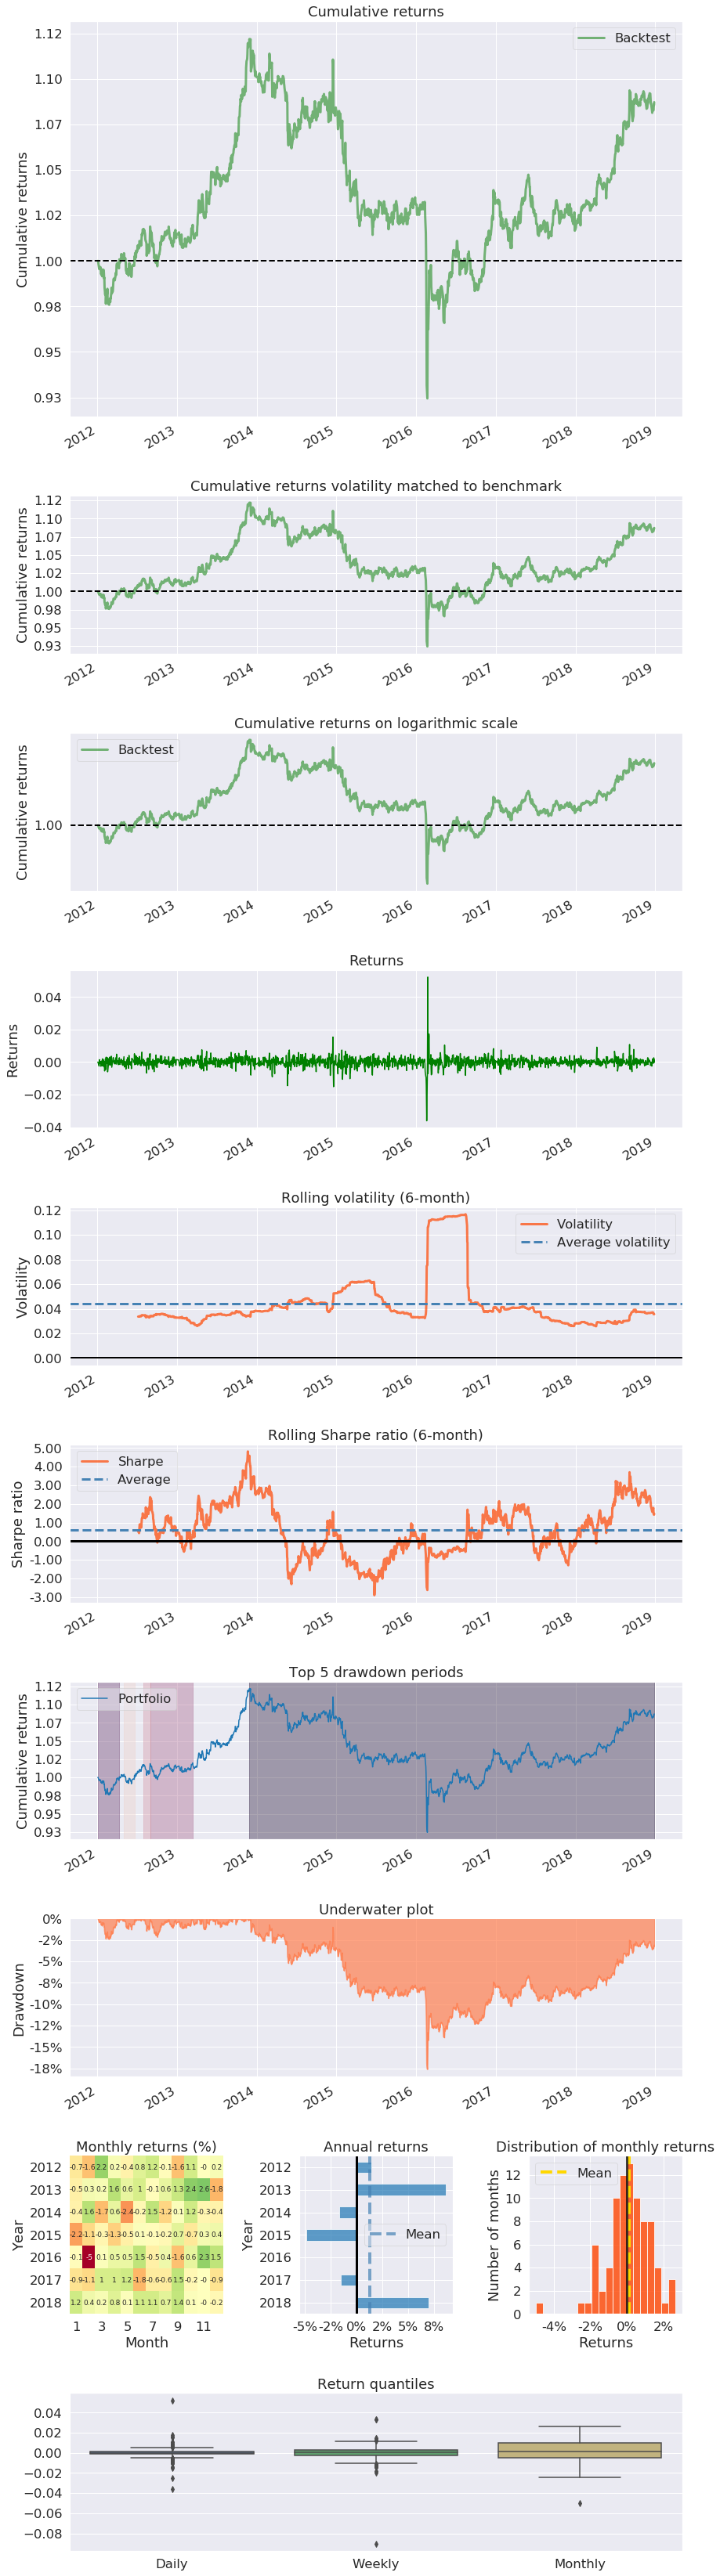

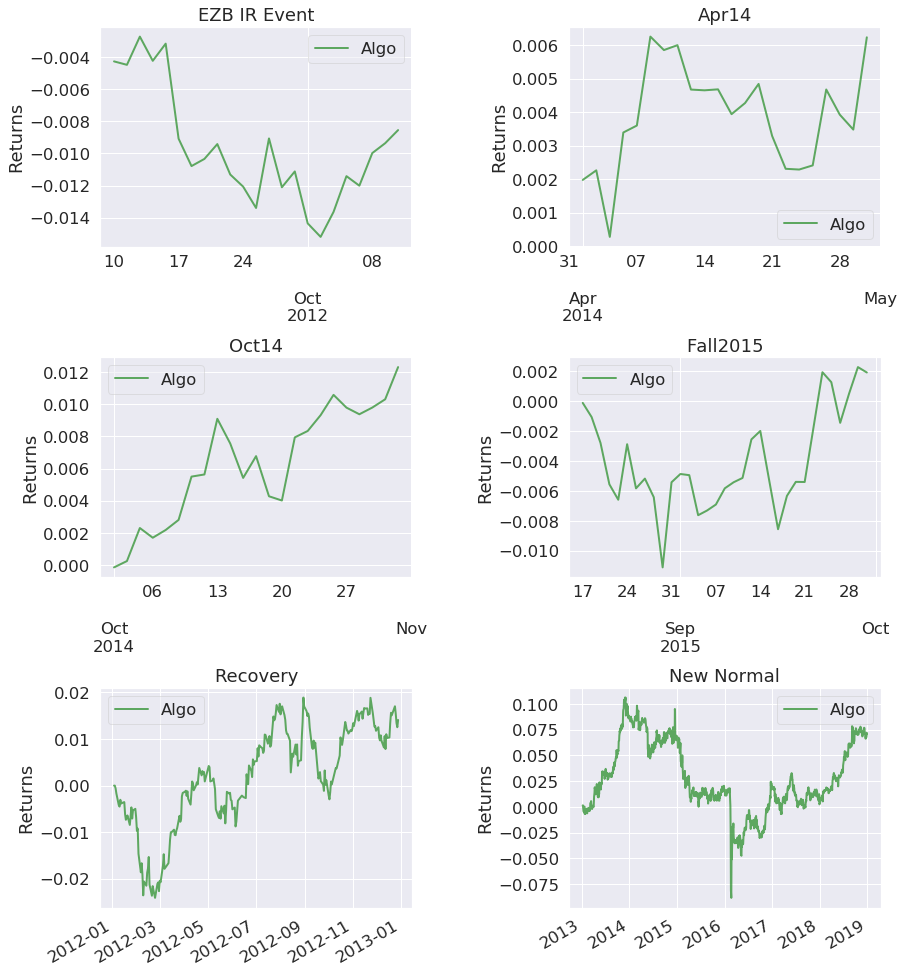

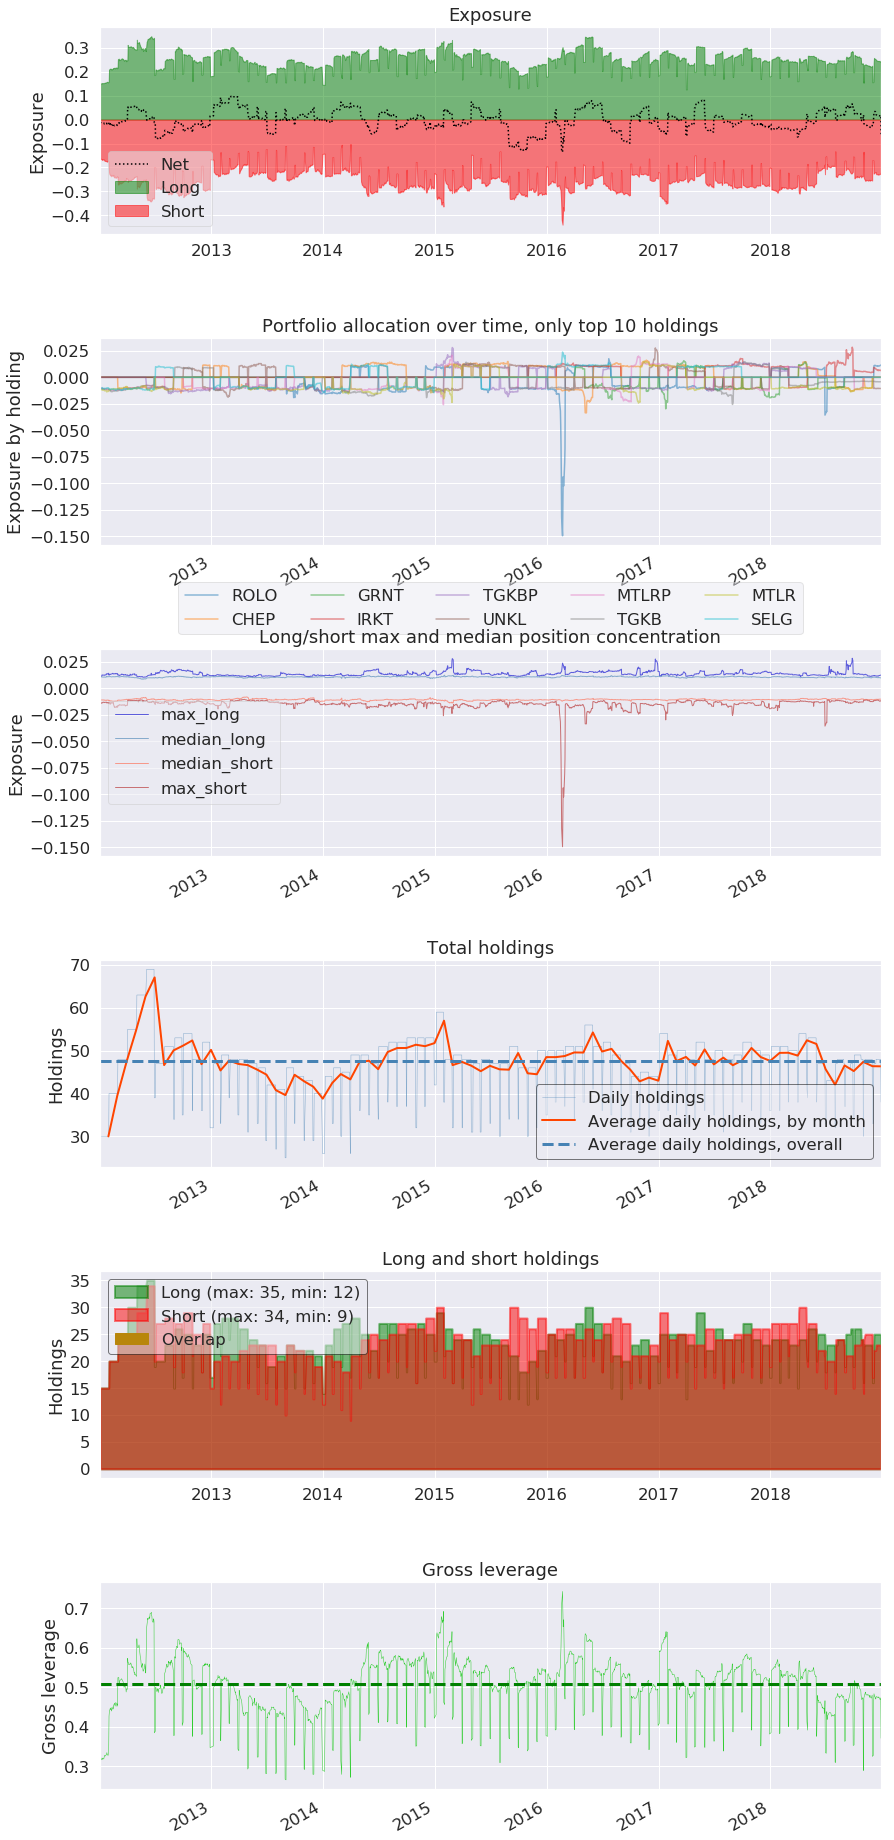

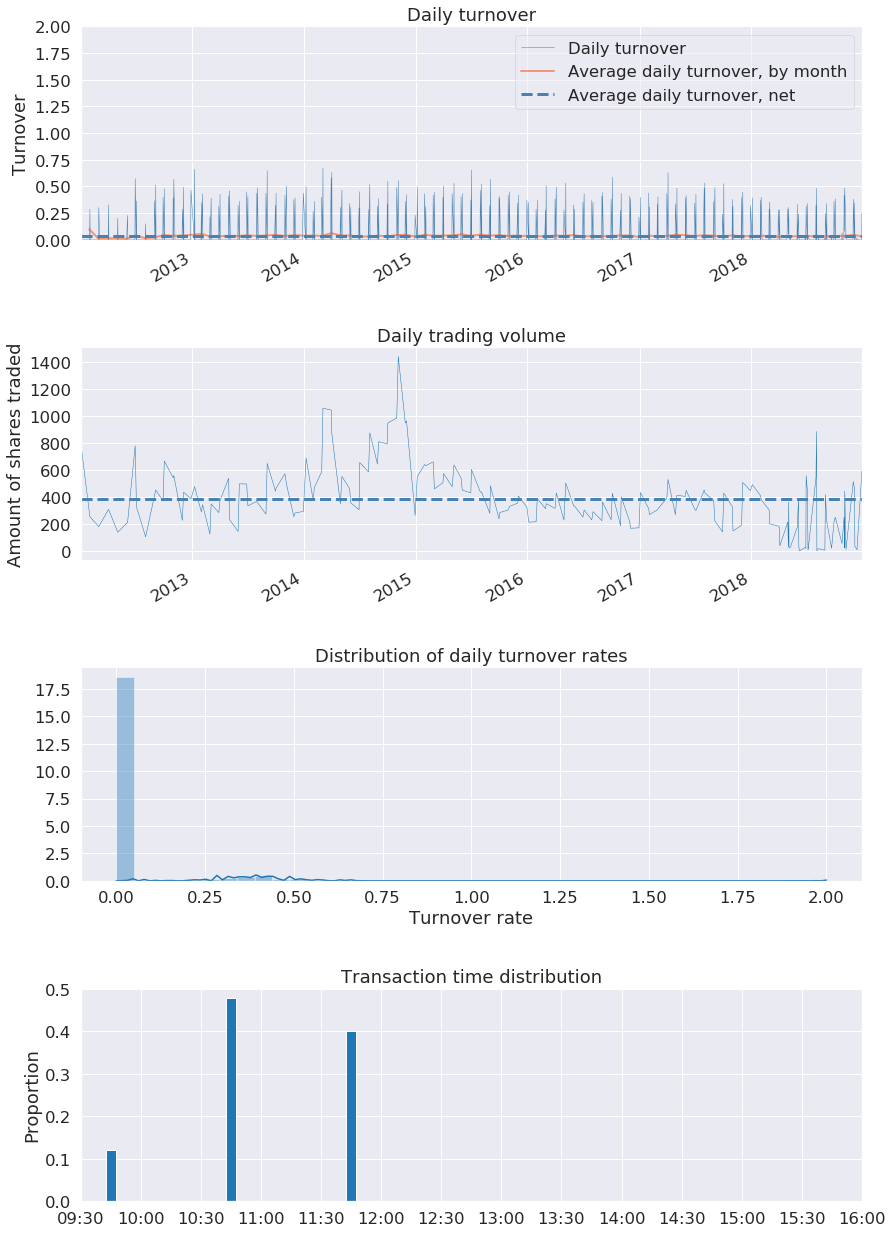

In [4]:
start = datetime(2012, 1, 3, 7, 0, 0, tzinfo=pytz.timezone('Europe/Moscow'))
end = datetime(2018, 12, 31, 7, 0, 0, tzinfo=pytz.timezone('Europe/Moscow'))
results = run_algorithm(
    start=start,
    end=end,
    initialize=initialize,
    capital_base=1000000,
    analyze=analyze,
    bundle='database_bundle2',
    trading_calendar=get_calendar('XMOS')
)
